# Тест Шапиро-Уилка

Тест Шапиро-Уилка на соответствие выборки нормальному распределению оптимально применять при объеме выборки n<=50. При большом значении выборок два нормальных распределения с большей вероятностью будут статистически различимы из-за большей чувствительности к данным отличных от нормальных

In [10]:
import math
from scipy import stats
import numpy as np
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
PATH = "/Users/daria/stepikcourse/"

In [3]:
# Генерируем рассматриваемое (наблюдаемое) распределение случайной величины 
rand_dist = stats.norm.rvs(loc=10, scale=2, size=1000, random_state=True)

In [4]:
# определяем критерий W (stats), и уровень значимости
stat, p = stats.shapiro(rand_dist)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.998, p=0.250


In [6]:
# сравниваем с пороговым значением уровня значимости
alpha = 0.05
if p > alpha:
    
# делаем вывод
	print('Нет оснований для отклонения Н0')
else:
	print('Различия статистически значимы, принимаем Н1')

Нет оснований для отклонения Н0


Проверим мощность теста на разных распределениях с различным количество элементов в выборке 

In [7]:
# зададим массивы нормальных распределений с М=0 и sigm=2 и объемом от 10 до 1000 с шагом увеличения 20 и от 3 до 40 с шагом 1
test_dist = [stats.norm.rvs(loc=10, scale=2, size=i, random_state=True) for i in np.arange(10, 1000, 20)]
test_dist_small = [stats.norm.rvs(loc=10, scale=2, size=i, random_state=True) for i in np.arange(3, 40, 1)]

In [8]:
# функция вычисления W критерия, а также соответствующих ему уровней p-value теста Шапиро-Уилка

def shapwiilk(dist): 
    W = []
    shap_pvalue = []
    samp_len = []
    
    for i in range(0, len(dist)):
        stat, p = stats.shapiro(dist[i])
        W.append(stats.shapiro(dist[i])[0])
        shap_pvalue.append(stats.shapiro(dist[i])[1])
        samp_len.append(len(dist[i]))
        
    return W, shap_pvalue, samp_len

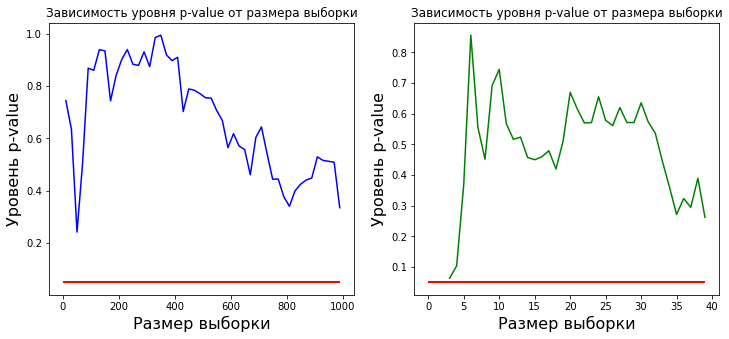

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax[0].plot(shapwiilk(test_dist)[2], shapwiilk(test_dist)[1], color='blue')
ax[1].plot(shapwiilk(test_dist_small)[2], shapwiilk(test_dist_small)[1], color='green')

for i in [0,1]:
    ax[i].set_title('Зависимость уровня p-value от размера выборки')
    ax[i].set_xlabel('Размер выборки', fontsize=16)
    ax[i].set_ylabel('Уровень p-value', fontsize=16)
   
ax[0].hlines(0.05, 0, max(shapwiilk(test_dist)[2]), color='r', lw=2)
ax[1].hlines(0.05, 0, max(shapwiilk(test_dist_small)[2]), color='r', lw=2)

Анализируя приведнный выше график можно сделать вывод, что тест Шапиро-Уилка хорошо справляется с распознованием нормально распределенных величин, однако с увеличиением выборки значение p-value снижается, это связано с тем, что с возрастающем размером выборки тест становится чувствительнее к значениям отклоняющимся от нормальных

Проверим как работает тест Шапиро-Уилка на экспоненциальном распределении

In [12]:
#зададим массив экспоненциальных распределений с М=20, размером выборок от 5 до 50 и параметром альфа 2, 1, 0.66, 0.5
expon_dist = [[stats.expon.rvs(loc=0, scale=j, size=i) for i in np.arange(5, 50, 2)] for j in np.arange(0.5, 2.5, 0.5)]

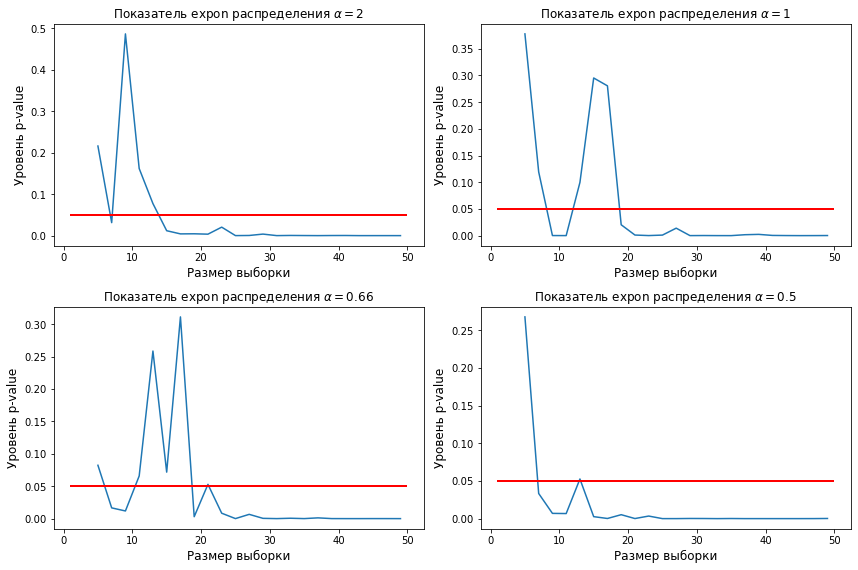

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
#fig.tight_layout()

n = 0
alpha = [2, 1, 0.66, 0.5]
for i in [0, 1]:
    
    for j in [0, 1]:
        
        ax[i][j].plot(shapwiilk(expon_dist[n])[2], shapwiilk(expon_dist[n])[1])
        ax[i][j].hlines(0.05, 50, 1, color='r',lw=2)
        ax[i][j].set_title(r'Показатель expon распределения $\alpha = $' f'{alpha[n]}', fontsize=12)
        ax[i][j].set_xlabel('Размер выборки', fontsize=12)
        ax[i][j].set_ylabel('Уровень p-value', fontsize=12)
        n = n + 1
        
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
#plt.show()

Для значений альфа равных 2, 1 и 0,66 тест уверенно себя показывается на выборках от 25 ед. (для p-value установленного в 0,05). Для альфа = 0,5 при размере выборки в 37 ед. произошел скачек критерия выше 0,05.  

Проверим как работает тест Шапиро-Уилка на равномерном распределении

In [14]:
#зададим массив равномерных распределений с размером выборок от 3 до 100 с шагом 5
straight_dist = [stats.uniform.rvs(loc=5, scale=2, size=n, random_state=True) for n in np.arange(3, 100, 5)]

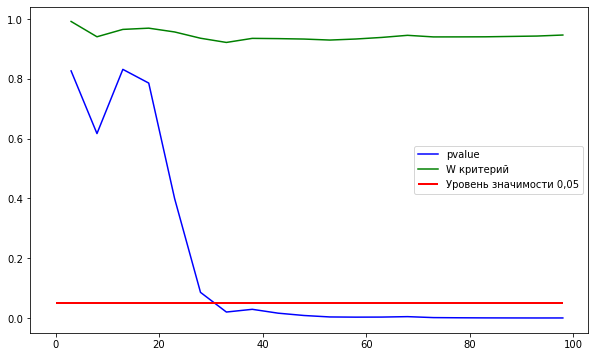

In [15]:
plt.plot(shapwiilk(straight_dist)[2], shapwiilk(straight_dist)[1], color='blue', label = 'pvalue')
plt.plot(shapwiilk(straight_dist)[2], shapwiilk(straight_dist)[0], color='green', label = 'W критерий')
plt.hlines(0.05, 0, max(shapwiilk(straight_dist)[2]), color='r',label = 'Уровень значимости 0,05', lw=2)
plt.legend()

Тест также хорошо себя показывает при выборках от 30 ед. 